In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
from scipy import stats
import seaborn as sns
%matplotlib inline

Text(0, 0.5, '$y$')

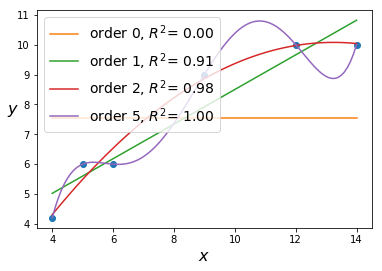

In [3]:
x = np.array([4., 5., 6., 9., 12., 14.])
y = np.array([4.2, 6., 6., 9., 10., 10.])
order = [0, 1, 2, 5]
plt.plot(x, y, 'o')
for i in order:
    x_n = np.linspace(x.min(), x.max(), 100)
    coeffs = np.polyfit(x, y, deg=i)
    ffit = np.polyval(coeffs, x_n)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.mean(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y-ybar)**2)
    r2 = ssreg / sstot
    plt.plot(x_n, ffit, label='order {}, $R^2$= {:.2f}'.format(i, r2))
plt.legend(loc=2, fontsize=14)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)

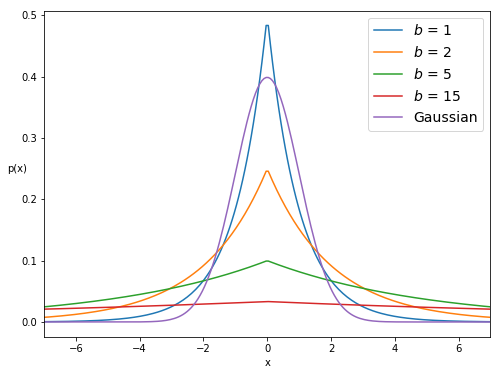

In [4]:
plt.figure(figsize=(8, 6))
x_values = np.linspace(-10, 10, 300)
for df in [1, 2, 5, 15]:
    distri = stats.laplace(scale=df)
    x_pdf = distri.pdf(x_values)
    plt.plot(x_values, x_pdf, label='$b$ = {}'.format(df))
    
x_pdf = stats.norm.pdf(x_values)
plt.plot(x_values, x_pdf, label='Gaussian')
plt.xlabel('x')
plt.ylabel('p(x)', rotation=0)
plt.legend(loc=0, fontsize=14)
plt.xlim(-7, 7)
plt.savefig('D:\\programs\\自己玩的东西\\Python贝叶斯分析\\教材内容\\B04958_06_03.png', dpi=300, figsize=[5.5, 5.5])

Text(0, 0.5, '$y$')

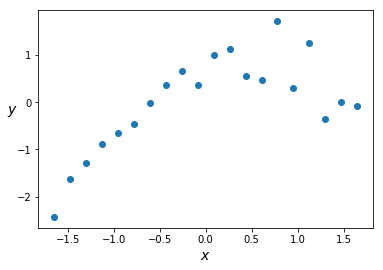

In [5]:
real_alpha = 4.25
real_beta = [8.7, -1.2]
data_size = 20
noise = np.random.normal(0, 2, size=data_size)
x_1 = np.linspace(0, 5, data_size)
y_1 = real_alpha + real_beta[0] * x_1 + real_beta[1] * x_1**2 + noise
order = 2
x_1p = np.vstack([x_1**i for i in range(1, order+1)])
x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True)) / x_1p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()
plt.scatter(x_1s[0], y_1s)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14, rotation=0)

In [9]:
with pm.Model() as model_l:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10)
    epsilon = pm.HalfCauchy('epsilon', 5)
    mu = alpha + beta * x_1s[0]
    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y_1s)
    trace_l = pm.sample(2000, chains=1)
chain_l = trace_l[100:]

Auto-assigning NUTS sampler...

Initializing NUTS using jitter+adapt_diag...

Sequential sampling (1 chains in 1 job)

NUTS: [epsilon, beta, alpha]

  0%|          | 0/2500 [00:00<?, ?it/s]

  3%|▎         | 67/2500 [00:00<00:03, 664.08it/s]

  6%|▌         | 156/2500 [00:00<00:03, 717.26it/s]

 11%|█         | 265/2500 [00:00<00:02, 797.69it/s]

 16%|█▌        | 394/2500 [00:00<00:02, 897.26it/s]

 21%|██        | 531/2500 [00:00<00:01, 998.91it/s]

 27%|██▋       | 683/2500 [00:00<00:01, 1111.23it/s]

 33%|███▎      | 828/2500 [00:00<00:01, 1192.34it/s]

 39%|███▉      | 979/2500 [00:00<00:01, 1269.78it/s]

 46%|████▌     | 1143/2500 [00:00<00:00, 1358.99it/s]

 52%|█████▏    | 1294/2500 [00:01<00:00, 1397.53it/s]

 58%|█████▊    | 1439/2500 [00:01<00:00, 1409.17it/s]

 64%|██████▎   | 1590/2500 [00:01<00:00, 1434.30it/s]

 70%|███████   | 1752/2500 [00:01<00:00, 1481.73it/s]

 76%|███████▌  | 1906/2500 [00:01<00:00, 1494.83it/s]

 83%|████████▎ | 2063/2500 [00:01<00:00, 1512.68it/s]

 89%|████████▊ | 2216/2500 [00:01<00:00, 1483.02it/s]

 95%|█████████▍| 2369/2500 [00:01<00:00, 1492.88it/s]

100%|██████████| 2500/2500 [00:01<00:00, 1381.87it/s]

Only one chain was sampled, this makes it impossible to run some convergence checks

In [10]:
with pm.Model() as model_p:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=x_1s.shape[0])
    epsilon = pm.HalfCauchy('epsilon', 5)
    mu = alpha + pm.math.dot(beta, x_1s)
    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y_1s)
    trace_p = pm.sample(1000, chains=1)
chain_p = trace_p[100:]

Auto-assigning NUTS sampler...

Initializing NUTS using jitter+adapt_diag...

Sequential sampling (1 chains in 1 job)

NUTS: [epsilon, beta, alpha]

  0%|          | 0/1500 [00:00<?, ?it/s]

  3%|▎         | 41/1500 [00:00<00:03, 402.37it/s]

  6%|▌         | 90/1500 [00:00<00:03, 424.19it/s]

  9%|▊         | 128/1500 [00:00<00:03, 407.39it/s]

 12%|█▏        | 178/1500 [00:00<00:03, 429.26it/s]

 15%|█▍        | 222/1500 [00:00<00:02, 430.02it/s]

 18%|█▊        | 269/1500 [00:00<00:02, 440.17it/s]

 21%|██        | 311/1500 [00:00<00:02, 430.06it/s]

 24%|██▎       | 355/1500 [00:00<00:02, 431.85it/s]

 27%|██▋       | 399/1500 [00:00<00:02, 433.11it/s]

 30%|██▉       | 444/1500 [00:01<00:02, 435.63it/s]

 33%|███▎      | 502/1500 [00:01<00:02, 469.76it/s]

 37%|███▋      | 550/1500 [00:01<00:02, 470.15it/s]

 40%|███▉      | 598/1500 [00:01<00:01, 460.95it/s]

 43%|████▎     | 646/1500 [00:01<00:01, 465.29it/s]

 46%|████▋     | 696/1500 [00:01<00:01, 473.97it/s]

 50%|████▉     | 744/1500 [00:01<00:01, 466.21it/s]

 53%|█████▎    | 791/1500 [00:01<00:01, 456.60it/s]

 56%|█████▌    | 837/1500 [00:01<00:01, 448.39it/s]

 59%|█████▉    | 889/1500 [00:01<00:01, 465.33it/s]

 63%|██████▎   | 939/1500 [00:02<00:01, 471.33it/s]

 66%|██████▌   | 987/1500 [00:02<00:01, 463.07it/s]

 69%|██████▉   | 1040/1500 [00:02<00:00, 480.14it/s]

 73%|███████▎  | 1089/1500 [00:02<00:00, 480.36it/s]

 76%|███████▌  | 1138/1500 [00:02<00:00, 479.11it/s]

 79%|███████▉  | 1187/1500 [00:02<00:00, 459.42it/s]

 82%|████████▏ | 1237/1500 [00:02<00:00, 467.07it/s]

 86%|████████▌ | 1287/1500 [00:02<00:00, 475.27it/s]

 89%|████████▉ | 1335/1500 [00:02<00:00, 475.41it/s]

 92%|█████████▏| 1387/1500 [00:02<00:00, 486.73it/s]

 96%|█████████▌| 1436/1500 [00:03<00:00, 473.72it/s]

 99%|█████████▉| 1484/1500 [00:03<00:00, 474.32it/s]

100%|██████████| 1500/1500 [00:03<00:00, 464.15it/s]

Only one chain was sampled, this makes it impossible to run some convergence checks

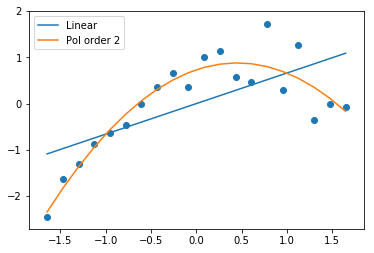

In [13]:
alpha_l_post = chain_l['alpha'].mean()
betas_l_post = chain_l['beta'].mean(axis=0)
idx = np.argsort(x_1s[0])
y_l_post = alpha_l_post + betas_l_post * x_1s[0]
plt.plot(x_1s[0][idx], y_l_post[idx], label='Linear')
alpha_p_post = chain_p['alpha'].mean()
betas_p_post = chain_p['beta'].mean(axis=0)
y_p_post = alpha_p_post + np.dot(betas_p_post, x_1s)
plt.plot(x_1s[0][idx], y_p_post[idx], label='Pol order {}'.format(order))
plt.scatter(x_1s[0], y_1s)
plt.legend()

In [17]:
pm.waic(trace=trace_l, model=model_l)[0]

C:\ProgramData\Anaconda3\lib\site-packages\pymc3\stats.py:218: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


51.884332747141144

C:\ProgramData\Anaconda3\lib\site-packages\pymc3\stats.py:218: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


C:\ProgramData\Anaconda3\lib\site-packages\pymc3\stats.py:218: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


C:\ProgramData\Anaconda3\lib\site-packages\pymc3\stats.py:299: UserWarning: Estimated shape parameter of Pareto distribution is
        greater than 0.7 for one or more samples.
        You should consider using a more robust model, this is because
        importance sampling is less likely to work well if the marginal
        posterior and LOO posterior are very different. This is more likely to
        happen with a non-robust model and highly influential observations.
  happen with a non-robust model and highly influential observations.""")


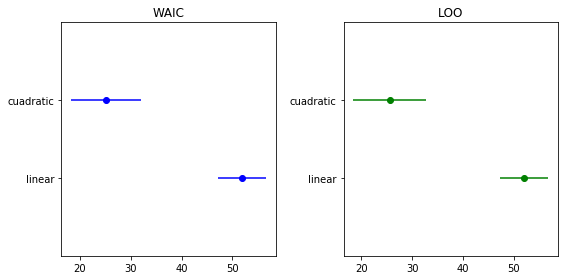

In [18]:
waic_l = pm.waic(trace_l, model_l)
waic_p = pm.waic(trace_p, model_p)
plt.figure(figsize=(8, 4))
plt.subplot(121)
for idx, ic in enumerate((waic_l, waic_p)):
    plt.errorbar(ic[0], idx, xerr=ic[1], fmt='bo')
plt.title('WAIC')
plt.yticks([0, 1], ['linear', 'cuadratic'])
plt.ylim(-1, 2)

loo_l = pm.loo(trace_l, model_l)
loo_p = pm.loo(trace_p, model_p)
plt.subplot(122)
for idx, ic in enumerate((loo_l, loo_p)):
    plt.errorbar(ic[0], idx, xerr=ic[1], fmt='go')
plt.title('LOO')
plt.yticks([0, 1], ['linear', 'cuadratic'])
plt.ylim(-1, 2)
plt.tight_layout()

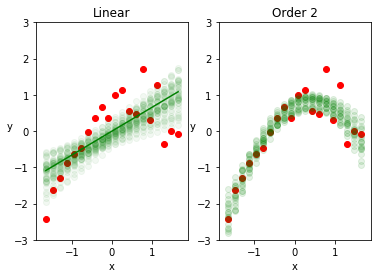

In [19]:
plt.subplot(121)
plt.scatter(x_1s[0], y_1s, c='r')
plt.ylim(-3, 3)
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.title('Linear')
for i in range(0, len(chain_l['alpha']), 50):
    plt.scatter(x_1s[0], chain_l['alpha'][i] + chain_l['beta'][i]*x_1s[0], c='g', edgecolors='g', alpha=0.05)
plt.plot(x_1s[0], chain_l['alpha'].mean() + chain_l['beta'].mean()*x_1s[0], c='g', alpha=1)

plt.subplot(122)
plt.scatter(x_1s[0], y_1s, c='r')
plt.ylim(-3, 3)
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.title('Order {}'.format(order))
for i in range(0, len(chain_p['alpha']), 50):
    plt.scatter(x_1s[0], chain_p['alpha'][i] + np.dot(chain_p['beta'][i], x_1s), c='g', edgecolors='g', alpha=0.1)
plt.plot(x_1s[0][idx], alpha_p_post+np.dot(betas_p_post, x_1s)[idx], c='g', alpha=1)

In [20]:
coins = 30
heads = 9
y = np.repeat([0, 1], [coins-heads, heads])

Sequential sampling (1 chains in 1 job)

CompoundStep

>BinaryGibbsMetropolis: [model_index]

>NUTS: [theta]

  0%|          | 0/5500 [00:00<?, ?it/s]

  2%|▏         | 100/5500 [00:00<00:05, 991.12it/s]

  5%|▍         | 252/5500 [00:00<00:04, 1104.47it/s]

  7%|▋         | 406/5500 [00:00<00:04, 1204.32it/s]

 10%|█         | 569/5500 [00:00<00:03, 1303.89it/s]

 14%|█▎        | 744/5500 [00:00<00:03, 1408.80it/s]

 17%|█▋        | 913/5500 [00:00<00:03, 1479.33it/s]

 20%|█▉        | 1076/5500 [00:00<00:02, 1517.71it/s]

 23%|██▎       | 1246/5500 [00:00<00:02, 1564.28it/s]

 26%|██▌       | 1424/5500 [00:00<00:02, 1619.32it/s]

 29%|██▉       | 1590/5500 [00:01<00:02, 1627.01it/s]

 32%|███▏      | 1767/5500 [00:01<00:02, 1663.21it/s]

 35%|███▌      | 1942/5500 [00:01<00:02, 1683.96it/s]

 38%|███▊      | 2116/5500 [00:01<00:01, 1695.93it/s]

 42%|████▏     | 2286/5500 [00:01<00:01, 1687.57it/s]

 45%|████▍     | 2457/5500 [00:01<00:01, 1689.73it/s]

 48%|████▊     | 2633/5500 [00:01<00:01, 1705.76it/s]

 51%|█████     | 2804/5500 [00:01<00:01, 1687.35it/s]

 54%|█████▍    | 2983/5500 [00:01<00:01, 1712.47it/s]

 57%|█████▋    | 3155/5500 [00:01<00:01, 1705.06it/s]

 61%|██████    | 3328/5500 [00:02<00:01, 1707.91it/s]

 64%|██████▎   | 3500/5500 [00:02<00:01, 1706.95it/s]

 67%|██████▋   | 3678/5500 [00:02<00:01, 1723.73it/s]

 70%|███████   | 3852/5500 [00:02<00:00, 1723.97it/s]

 73%|███████▎  | 4025/5500 [00:02<00:00, 1716.04it/s]

 76%|███████▋  | 4198/5500 [00:02<00:00, 1715.46it/s]

 79%|███████▉  | 4372/5500 [00:02<00:00, 1718.33it/s]

 83%|████████▎ | 4544/5500 [00:02<00:00, 1698.99it/s]

 86%|████████▌ | 4720/5500 [00:02<00:00, 1712.36it/s]

 89%|████████▉ | 4892/5500 [00:02<00:00, 1684.95it/s]

 92%|█████████▏| 5066/5500 [00:03<00:00, 1696.63it/s]

 95%|█████████▌| 5241/5500 [00:03<00:00, 1707.81it/s]

 98%|█████████▊| 5412/5500 [00:03<00:00, 1698.81it/s]

100%|██████████| 5500/5500 [00:03<00:00, 1667.87it/s]

Only one chain was sampled, this makes it impossible to run some convergence checks

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000234BC449198>,
      dtype=object)

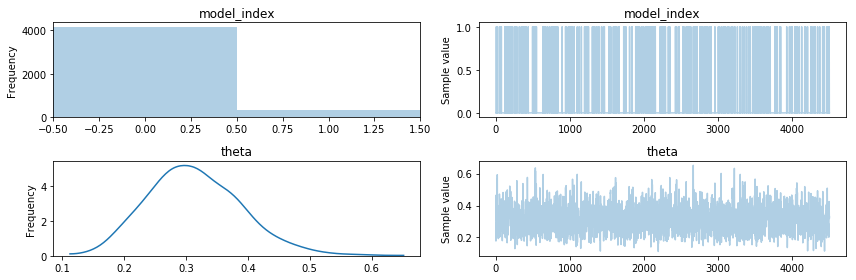

In [21]:
import theano.tensor as tt
with pm.Model() as model_BF:
    p = np.array([0.5, 0.5])
    model_index = pm.Categorical('model_index', p=p)
    m_0 = (4, 8)
    m_1 = (8, 4)
    m = tt.switch(pm.math.eq(model_index, 0), m_0, m_1)
    
    theta = pm.Beta('theta', m[0], m[1])
    y = pm.Bernoulli('y', theta, observed=y)
    trace_BF = pm.sample(5000, chains=1)
chain_BF = trace_BF[500:]
pm.traceplot(chain_BF)

In [22]:
pM1 = chain_BF['model_index'].mean()
pM0 = 1 - pM1
BF = (pM0/pM1)*(p[1]/p[0])

In [27]:
coins = 300
heads = 90
y = np.repeat([0, 1], [coins-heads, heads])

Auto-assigning NUTS sampler...

Initializing NUTS using jitter+adapt_diag...

Sequential sampling (1 chains in 1 job)

NUTS: [theta]

  0%|          | 0/5500 [00:00<?, ?it/s]

  3%|▎         | 176/5500 [00:00<00:03, 1744.38it/s]

  7%|▋         | 397/5500 [00:00<00:02, 1857.86it/s]

 12%|█▏        | 658/5500 [00:00<00:02, 2029.42it/s]

 17%|█▋        | 929/5500 [00:00<00:02, 2190.01it/s]

 22%|██▏       | 1186/5500 [00:00<00:01, 2286.18it/s]

 26%|██▋       | 1450/5500 [00:00<00:01, 2376.18it/s]

 31%|███       | 1703/5500 [00:00<00:01, 2414.11it/s]

 36%|███▌      | 1957/5500 [00:00<00:01, 2444.21it/s]

 40%|████      | 2215/5500 [00:00<00:01, 2477.00it/s]

 45%|████▍     | 2473/5500 [00:01<00:01, 2500.49it/s]

 50%|████▉     | 2732/5500 [00:01<00:01, 2520.08it/s]

 54%|█████▍    | 2994/5500 [00:01<00:00, 2542.59it/s]

 59%|█████▉    | 3252/5500 [00:01<00:00, 2546.92it/s]

 64%|██████▍   | 3512/5500 [00:01<00:00, 2555.84it/s]

 69%|██████▊   | 3772/5500 [00:01<00:00, 2562.12it/s]

 73%|███████▎  | 4028/5500 [00:01<00:00, 2539.41it/s]

 78%|███████▊  | 4287/5500 [00:01<00:00, 2547.62it/s]

 83%|████████▎ | 4547/5500 [00:01<00:00, 2556.33it/s]

 87%|████████▋ | 4804/5500 [00:01<00:00, 2553.57it/s]

 92%|█████████▏| 5061/5500 [00:02<00:00, 2551.65it/s]

 97%|█████████▋| 5319/5500 [00:02<00:00, 2553.27it/s]

100%|██████████| 5500/5500 [00:02<00:00, 2503.70it/s]

Only one chain was sampled, this makes it impossible to run some convergence checks

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000234BBC45128>,
      dtype=object)

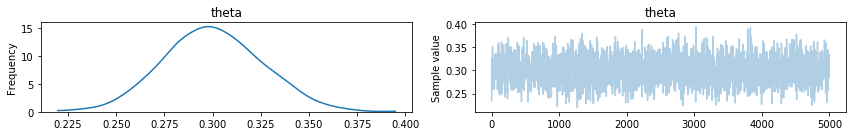

In [24]:
with pm.Model() as model_BF_0:
    theta = pm.Beta('theta', 4, 8)
    y = pm.Bernoulli('y', theta, observed=y)
    trace_BF_0 = pm.sample(5000, chains=1)
chain_BF_0 = trace_BF_0[500:]
pm.traceplot(trace_BF_0)

Auto-assigning NUTS sampler...

Initializing NUTS using jitter+adapt_diag...

Sequential sampling (1 chains in 1 job)

NUTS: [theta]

  0%|          | 0/5500 [00:00<?, ?it/s]

  3%|▎         | 161/5500 [00:00<00:03, 1595.70it/s]

  7%|▋         | 396/5500 [00:00<00:02, 1762.17it/s]

 11%|█▏        | 625/5500 [00:00<00:02, 1888.87it/s]

 16%|█▌        | 864/5500 [00:00<00:02, 2011.10it/s]

 20%|██        | 1119/5500 [00:00<00:02, 2142.38it/s]

 25%|██▌       | 1375/5500 [00:00<00:01, 2247.30it/s]

 29%|██▉       | 1622/5500 [00:00<00:01, 2303.98it/s]

 34%|███▍      | 1889/5500 [00:00<00:01, 2396.99it/s]

 39%|███▉      | 2145/5500 [00:00<00:01, 2437.42it/s]

 44%|████▎     | 2404/5500 [00:01<00:01, 2474.89it/s]

 48%|████▊     | 2650/5500 [00:01<00:01, 2463.75it/s]

 53%|█████▎    | 2908/5500 [00:01<00:01, 2491.02it/s]

 57%|█████▋    | 3162/5500 [00:01<00:00, 2498.88it/s]

 62%|██████▏   | 3422/5500 [00:01<00:00, 2521.79it/s]

 67%|██████▋   | 3687/5500 [00:01<00:00, 2552.30it/s]

 72%|███████▏  | 3952/5500 [00:01<00:00, 2574.10it/s]

 77%|███████▋  | 4212/5500 [00:01<00:00, 2574.94it/s]

 81%|████████▏ | 4470/5500 [00:01<00:00, 2569.55it/s]

 86%|████████▌ | 4727/5500 [00:01<00:00, 2562.79it/s]

 91%|█████████ | 4984/5500 [00:02<00:00, 2550.47it/s]

 95%|█████████▌| 5243/5500 [00:02<00:00, 2555.40it/s]

100%|█████████▉| 5499/5500 [00:02<00:00, 2549.94it/s]

100%|██████████| 5500/5500 [00:02<00:00, 2473.33it/s]

Only one chain was sampled, this makes it impossible to run some convergence checks

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000234BBDFBF98>,
      dtype=object)

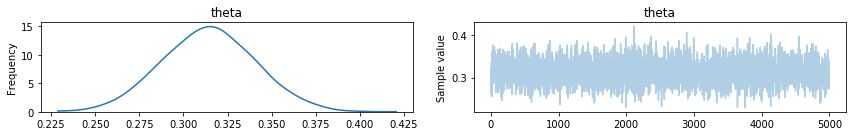

In [28]:
with pm.Model() as model_BF_1:
    theta = pm.Beta('theta', 8, 4)
    y = pm.Bernoulli('y', theta, observed=y)
    trace_BF_1 = pm.sample(5000, chains=1)
chain_BF_1 = trace_BF_1[500:]
pm.traceplot(trace_BF_1)